In [146]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
!pip install missingno
import missingno as msno
import string
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from scipy.stats import f_oneway


%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable


In [147]:
# to check the working directory
os.getcwd()

'C:\\Users\\wajiz.pk\\Desktop\\BI 2'

In [148]:
df = pd.read_excel('KHANSA JUNAID_23074_SUMAIR KHANANI_22995_DIRTYDATA.xlsx')
print(df.shape)
print(df.columns)

(84548, 22)
Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')


In [149]:
df.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,No Number,,65000,NaN,...,5,0,5,1633,6440,1900,2,C2,6625000,why
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,,C7,NaN,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,,C7,NaN,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,,C4,NaN,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,,C2,NaN,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,405.0,16,,C4,NaN,...,20,0,20,2581,9730,1900,2,C4,-,later
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,406.0,32,,C4,NaN,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,407.0,18,,C7,NaN,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,NaN,379.0,34,,D5,NaN,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387.0,153,,D9,NaN,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


PRE PROCESSING OF DATA

First we wil handle inconsistencies in the data. Once all the data is consistent that is, that once all the columns are in the correct format and layout, then we will carry on with handling the missing values

In [150]:
df.dtypes

Unnamed: 0                          int64
BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                                object
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE                          object
dtype: object

As can be observed, numerous columns' datatypes are logically erroneous, permitting invalid values and resulting in inconsistent data. To improve data accuracy, they must be fixed and incorrect values eliminated.

In [151]:
def count(df):
    empty_strings = df.astype(str).apply(lambda x: x.str.strip() == '').sum()
    return empty_strings
count(df)

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65495
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

In [152]:
#Empty strings are replaced with null values so can be handled later.
df = df.replace(' ', np.nan)

In [153]:
#to get invalid entriesin columns of datatype that must be of numeric type
def num(df):
    string_cols = df.columns
    strings = []
    seen_vals = set()
    for col in string_cols:
        for val in df[col]:
            if isinstance(val, str) and val not in seen_vals:
                seen_vals.add(val)
                strings.append(val)
    return strings

In [154]:
#Several columns containing numerical values were of object type. This may have allowed data entry errors of string or character type.
#Detecting these invalid entries before changing into the correct datatype.

print(num(df[['RESIDENTIAL UNITS']]))
print(num(df[['TOTAL UNITS']]))
print(num(df[['LAND SQUARE FEET']]))
print(num(df[['GROSS SQUARE FEET']]))
print(num(df[['YEAR BUILT']]))
print(num(df[['SALE DATE']]))
print(num(df[['SALE PRICE']]))
print(num(df[['LOT']]))
print(num(df[['ZIP CODE']]))

[]
[]
[' -  ']
[' -  ']
[]
['why ', 'later', 'not sure']
[' -  ']
['No Number', 'v']
[]


In [155]:
#The entries which are wrong above are replaced with null values.

df = df.replace('why ', np.nan)
df = df.replace('later', np.nan)
df = df.replace('not sure', np.nan)
df = df.replace(' -  ', np.nan)
df = df.replace('-', np.nan)
df = df.replace('No Number', np.nan)
df = df.replace('v', np.nan)


In [156]:
#Correcting datatype of the columns for increasing data efficiency for analysis.

df['ZIP CODE'] = df['ZIP CODE'].astype('Int64')
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].astype('Int64')
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].astype('Int64')
df['SALE PRICE'] = df['SALE PRICE'].astype('Int64')
df['YEAR BUILT'] = df['YEAR BUILT'].astype('Int64')
df['BLOCK'] = df['BLOCK'].astype('Int64')
df['LOT'] = df['LOT'].astype('Int64')
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('object')

Analyzing the dataset, some of the numerical columns such as the YEAR BUILT, ZIP CODE, LAND SQUARE FEET and GROSS SQUARE FEET had entries 0 which is logically incorrect. These values were making data inconsistent hence these must be detected and removed.

In [157]:
#The function returns a boolean value, checks if 0's are present in the column. It then replaces the 0's with null values and return TRUE
#If the column has no return values, the function returns FALSE.

def replacezeros(df, col_name):
    if df[df[col_name] == 0.0].shape[0] > 0:
        df[col_name] = df[col_name].replace(0, np.nan)
        return True
    else:
        return False

In [158]:
replacezeros(df, 'ZIP CODE')

True

In [159]:
replacezeros(df, 'LAND SQUARE FEET')

True

In [160]:
replacezeros(df, 'GROSS SQUARE FEET')

True

In [161]:
replacezeros(df, 'YEAR BUILT')

True

MISSING VALUE HANDLING

In [162]:
#We dropped unnamed because we do not know what data does this column represents, hence we have dropped this column

df.drop('Unnamed: 0', axis=1, inplace=True)

In [163]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                         30
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                745
BLOCK                                16
LOT                                  10
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                              45
APARTMENT NUMBER                  65496
ZIP CODE                           1018
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  36578
GROSS SQUARE FEET                 39029
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             3
dtype: int64

<AxesSubplot:>

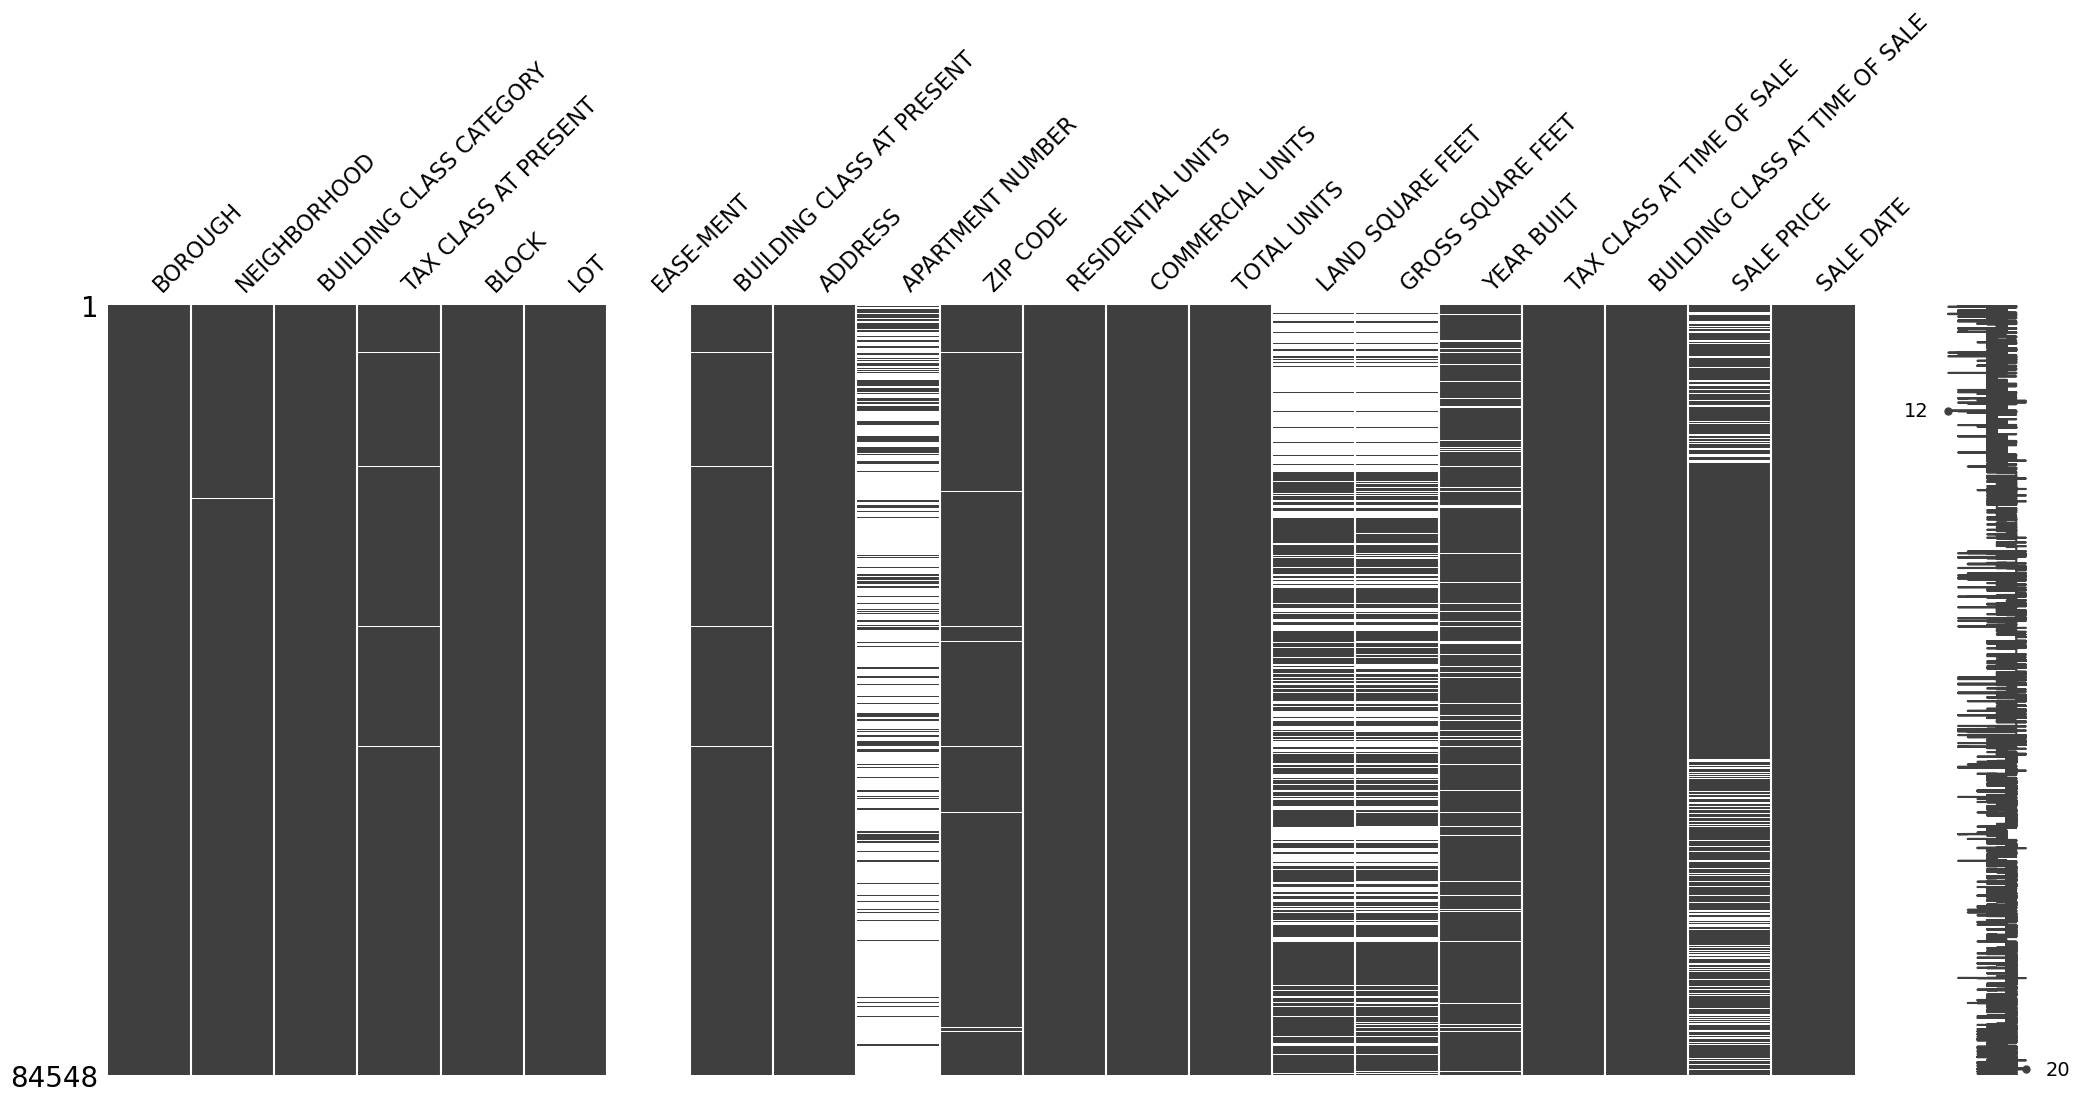

In [164]:
msno.matrix(df)

In this graph, the white lines in the bars represents the missing values. So we can see that the column 'EASE-MENT' is completely empty, on the other hand in "APARTMENT NUMBER" we can again see that there are many missing values. So by looking at this we reached a conclusion to drop these two columns because there are many missing values which makes it practically impossible to analyze the data.
"LAND SQUARE FEET", "GROSS SQUARE FEET", "TAX CLASS AT PRESENT" and "BUILDING CLASS AT PRESENT" can be treated as Missing not at Random(MNAR), because they have fewer missing values.

<AxesSubplot:>

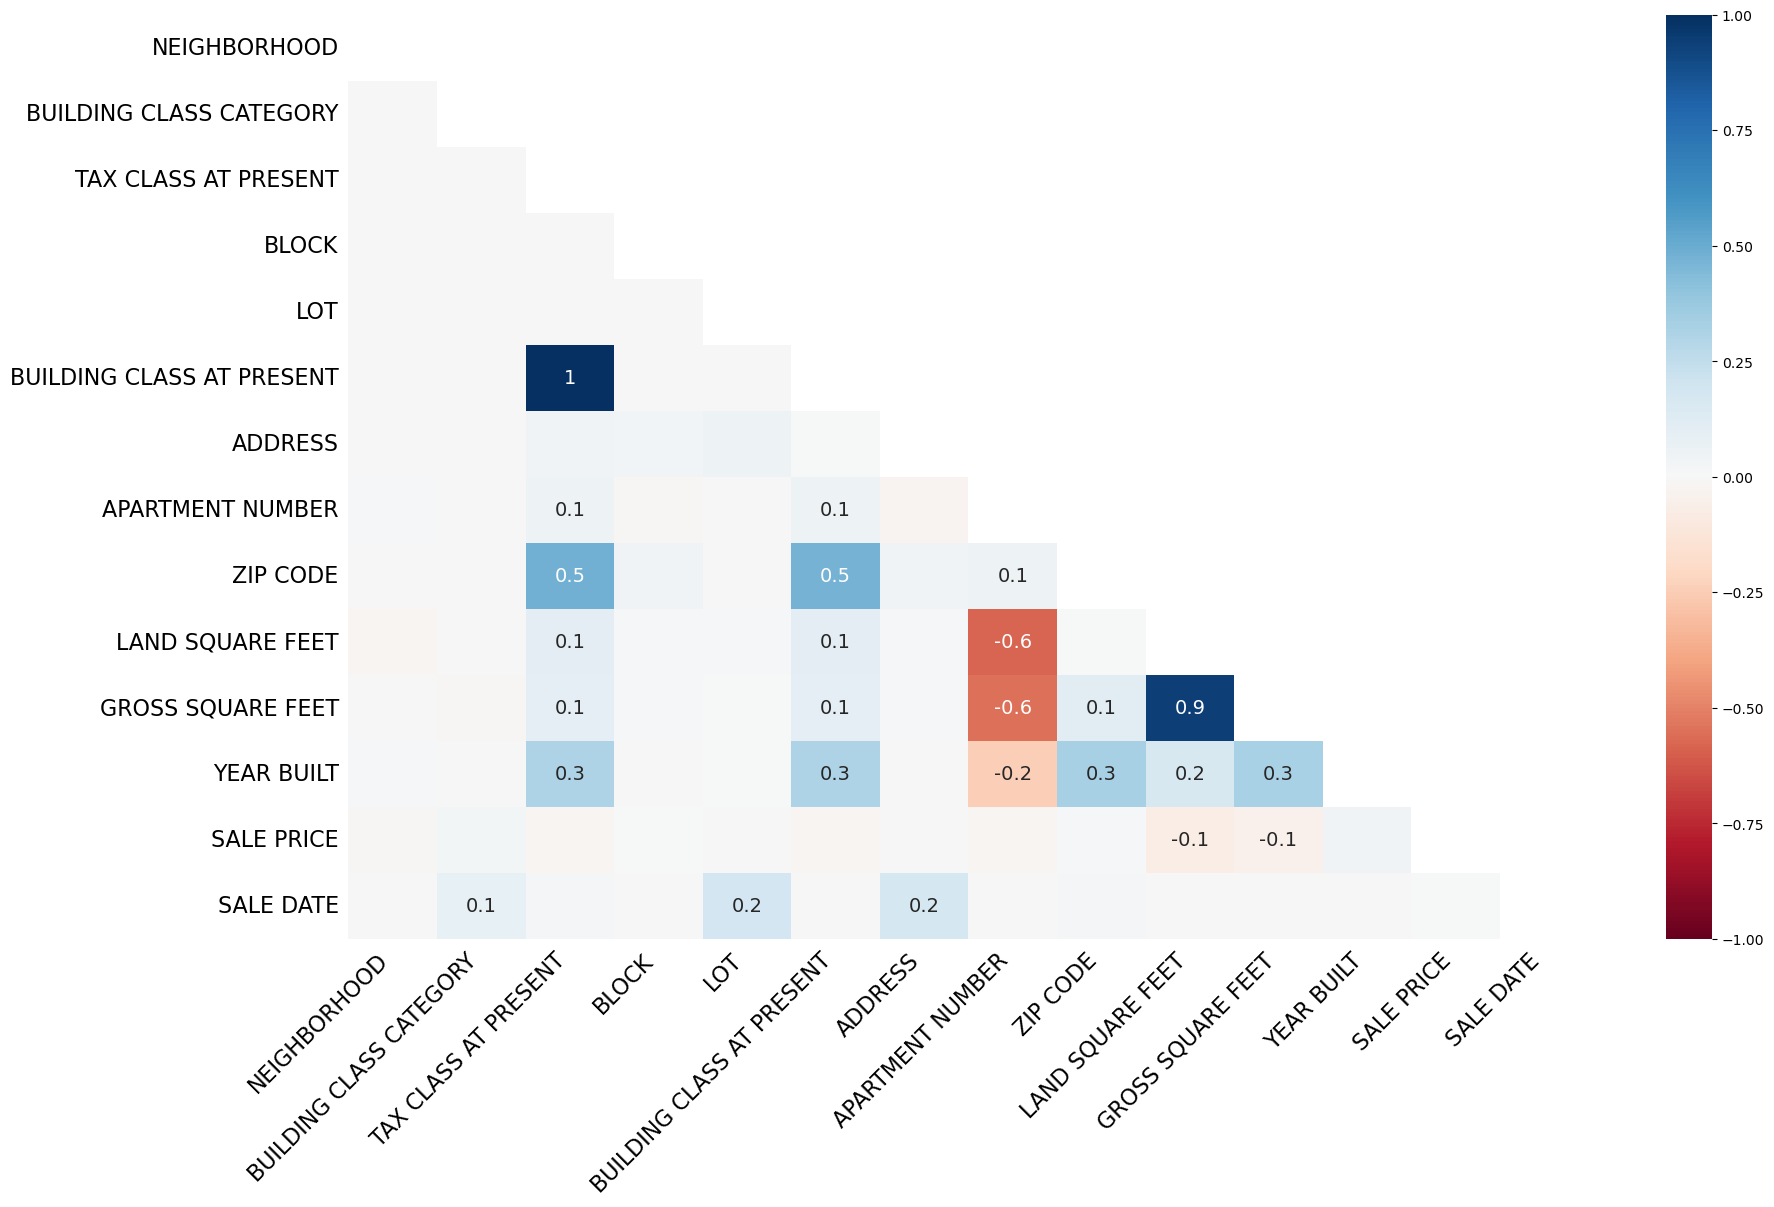

In [165]:
msno.heatmap(df)

* From the above correlation matrix we can observe that most of the columns are MAR (Missing at Random).
* Imputation would be the best technique to fill in these missing values since the missing values are  MAR and MNAR.

<AxesSubplot:>

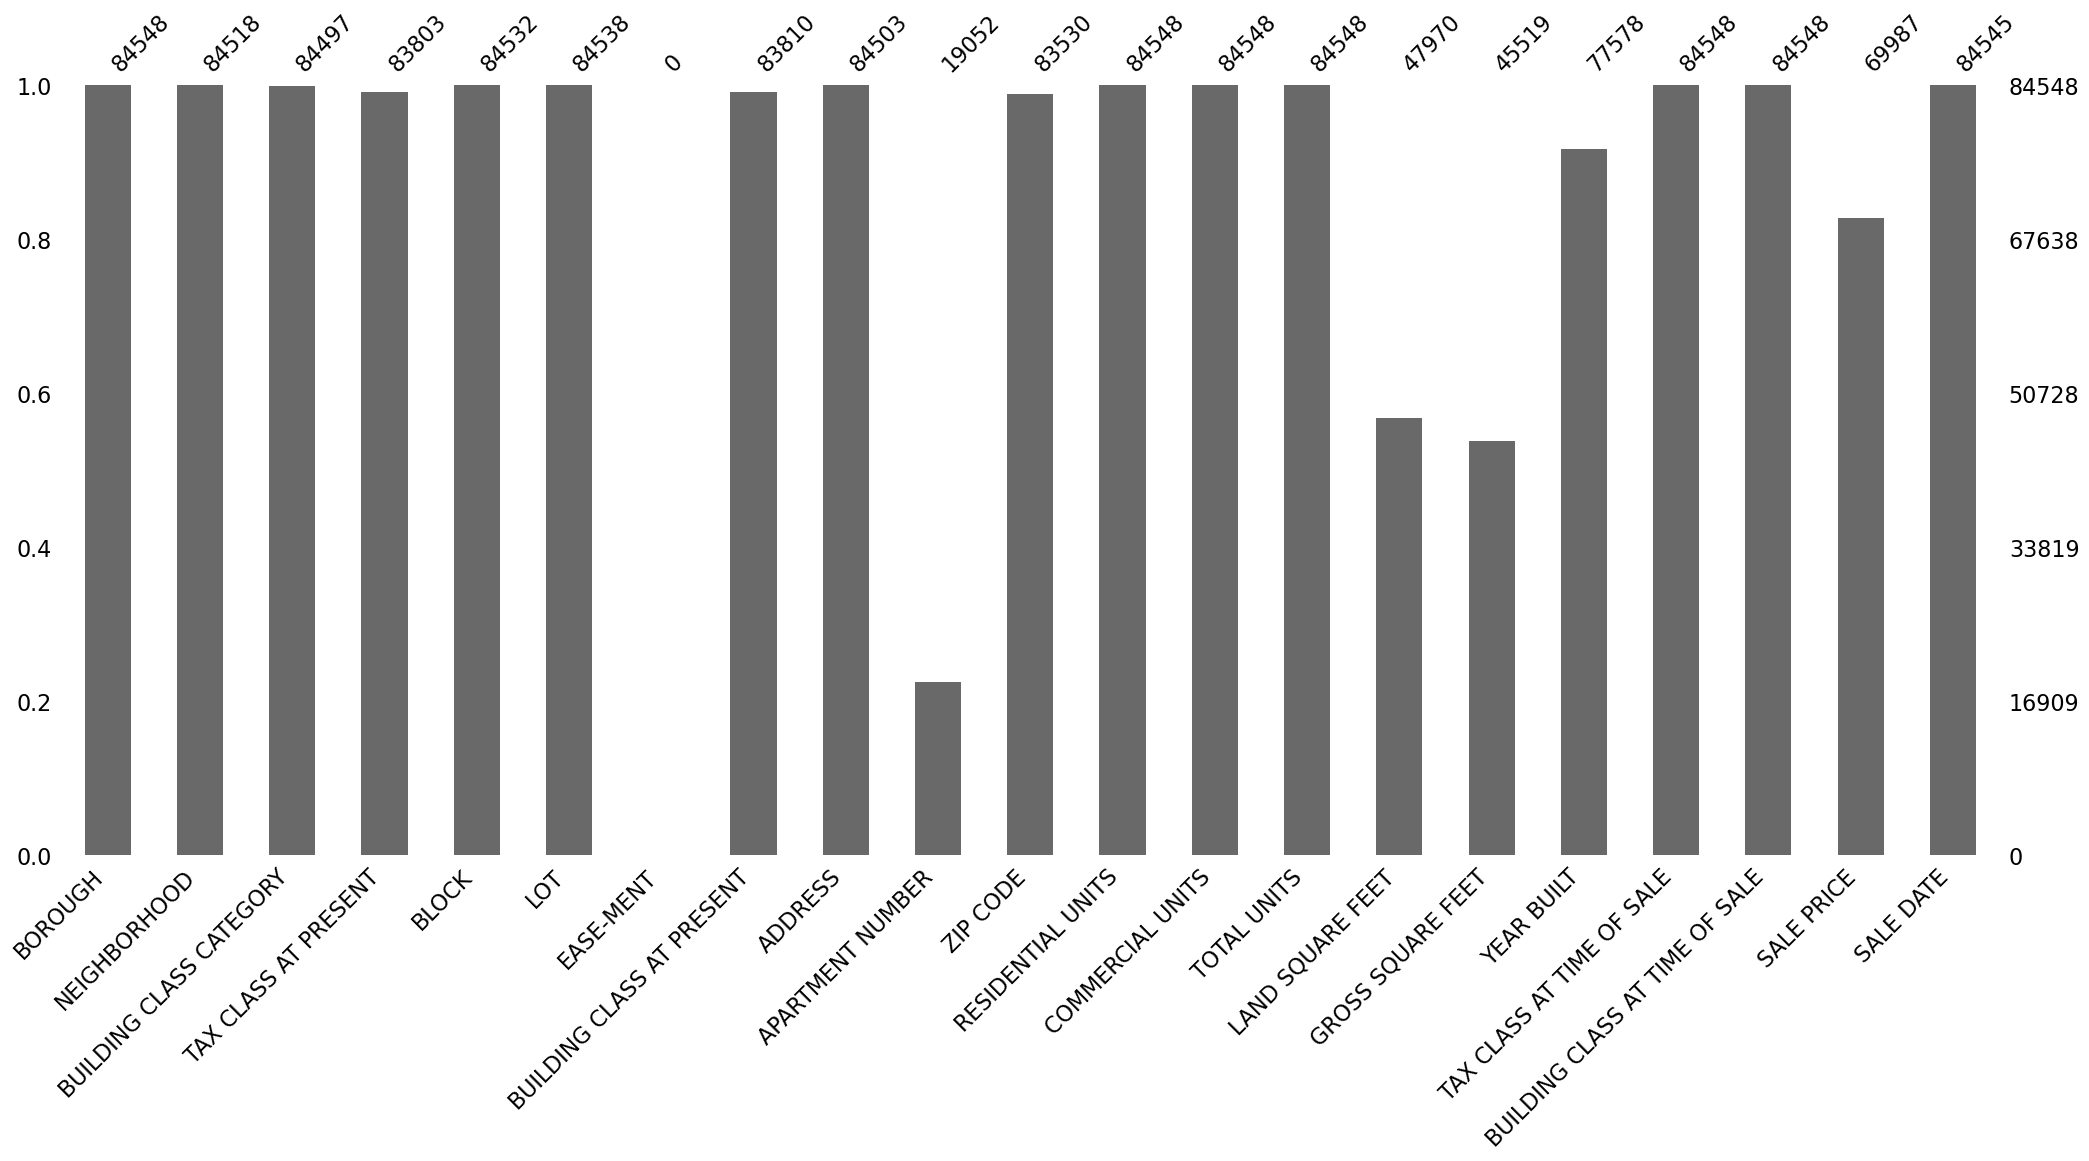

In [166]:
msno.bar(df)

The bar above shows missing values in the column EASEMENT, APARTMENT NUMBER,LAND SQUARE FEET, GROSS SQUARE FEET and SALE PRICE. 

<AxesSubplot:>

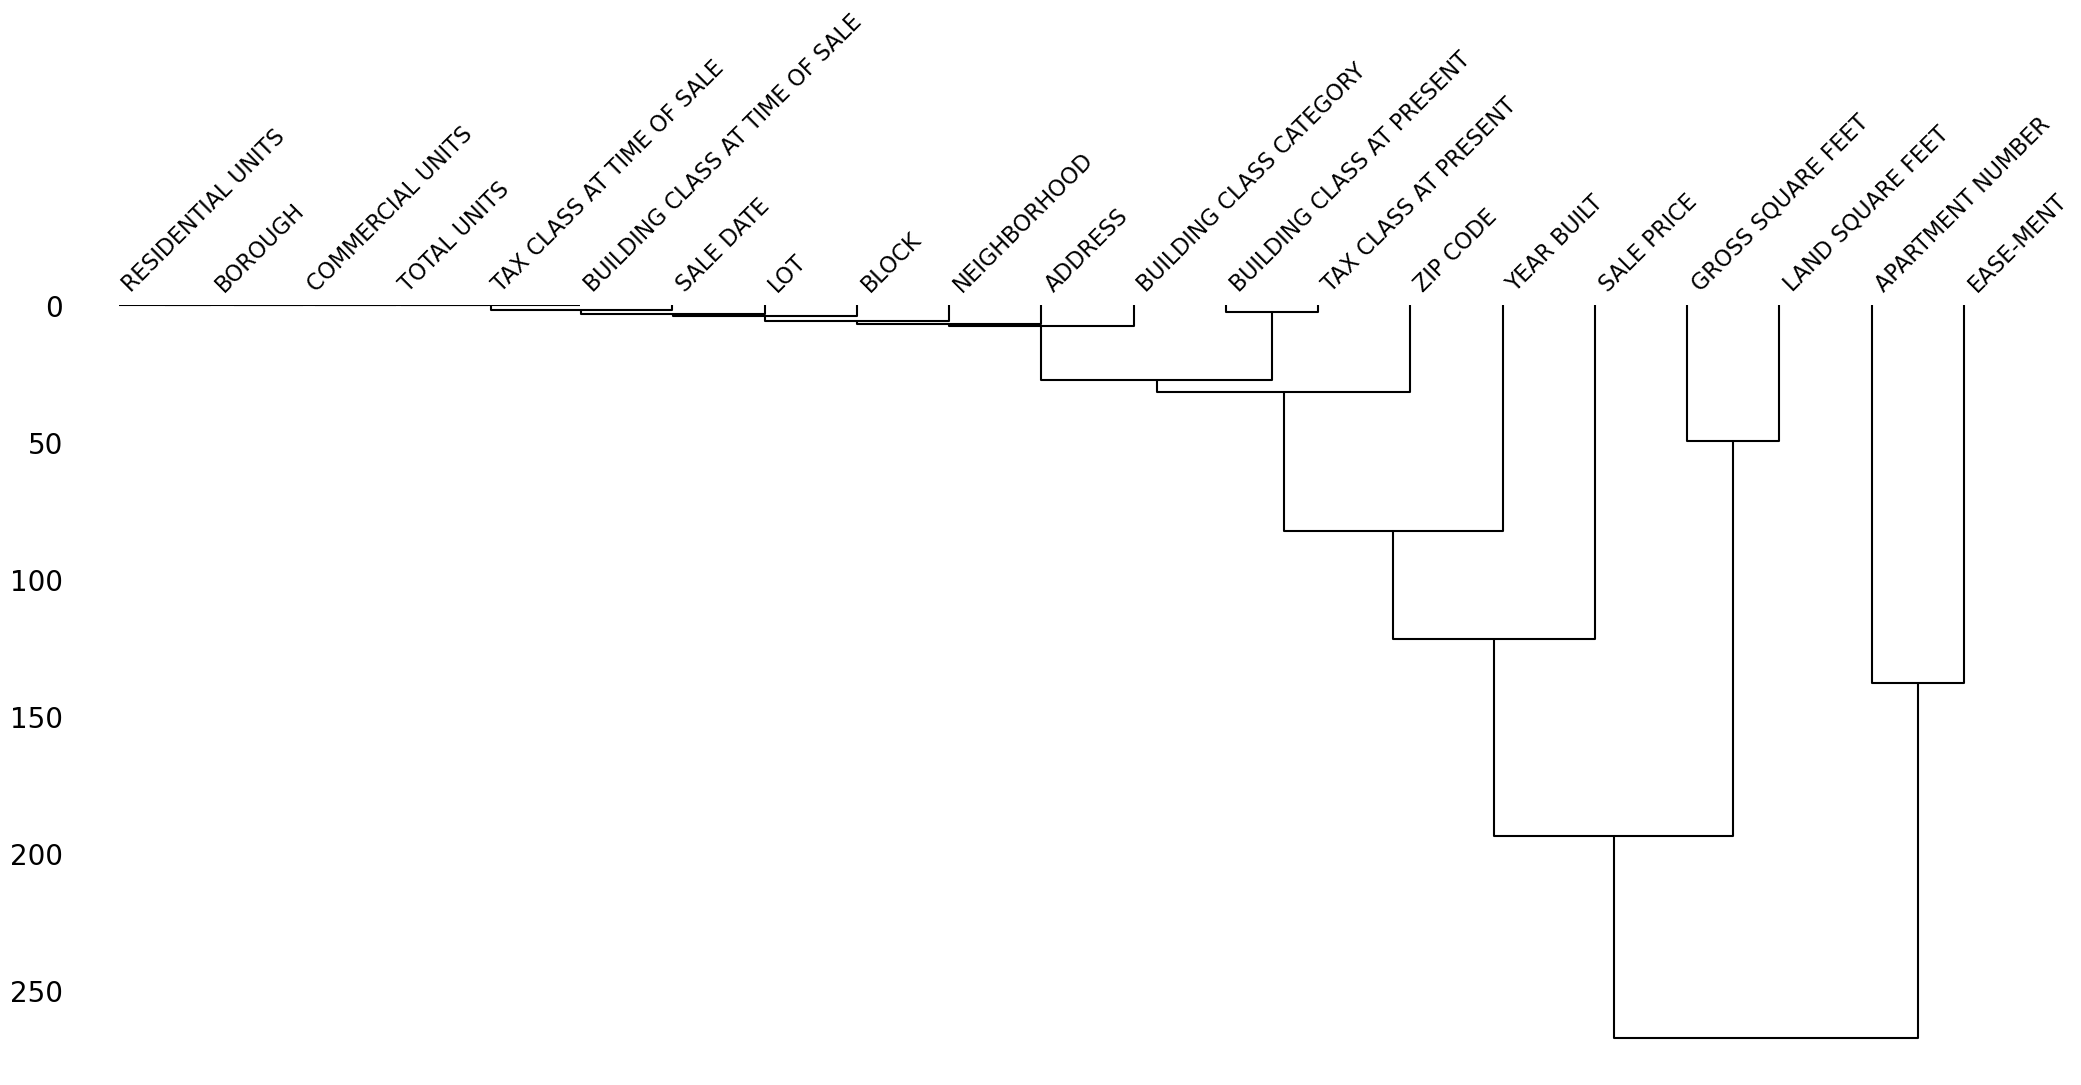

In [167]:
msno.dendrogram(df)

The dendogram above also tell us about the correlation of missing values and MNAR.

In [168]:
df.drop(columns=['EASE-MENT', 'APARTMENT NUMBER'],inplace=True)

In [169]:
print(df['NEIGHBORHOOD'].value_counts())

FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
FRESH KILLS                    2
BRONX PARK                     1
PELHAM BAY                     1
EAST RIVER                     1
CITY ISLAND-PELHAM STRIP       1
Name: NEIGHBORHOOD, Length: 254, dtype: int64


In [170]:
#This tells us the relationship between "NEIGHBORHOOD" and "BOROUGH".It shows us the mode value of "NEIGHBORHOOD" in each "BOROUGH"
pd.crosstab(df["NEIGHBORHOOD"], df["BOROUGH"], dropna=False)

BOROUGH,1,2,3,4,5
NEIGHBORHOOD,,,,,
AIRPORT LA GUARDIA,0,0,0,8,0
ALPHABET CITY,204,0,0,0,0
ANNADALE,0,0,0,0,198
ARDEN HEIGHTS,0,0,0,0,278
ARROCHAR,0,0,0,0,45
...,...,...,...,...,...
WOODHAVEN,0,0,0,413,0
WOODLAWN,0,85,0,0,0
WOODROW,0,0,0,0,131


<AxesSubplot:>

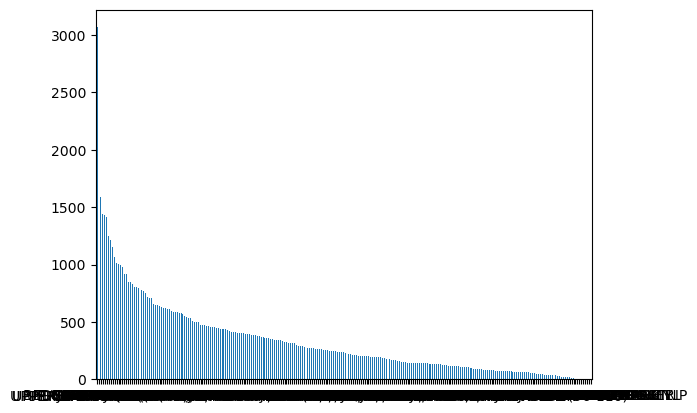

In [171]:
df['NEIGHBORHOOD'].value_counts().plot.bar(rot=0)

In [172]:
df['NEIGHBORHOOD'].fillna(df.groupby(['BOROUGH'])['NEIGHBORHOOD'].transform(lambda x: x.mode()[0]), inplace=True)

<AxesSubplot:>

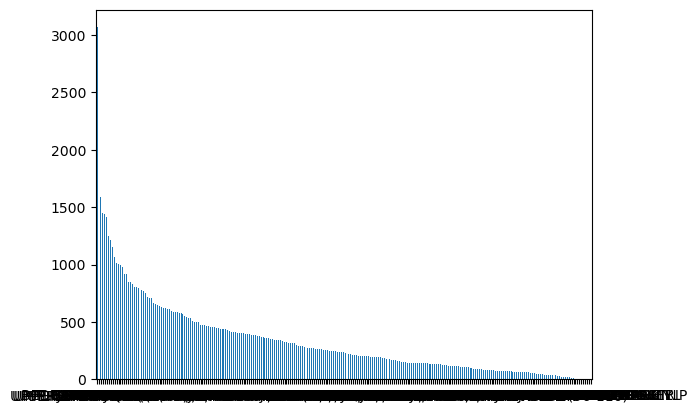

In [173]:
df['NEIGHBORHOOD'].value_counts().plot.bar(rot=0)

We handled column NEIGHBORHOUD by filling with mode of the column by grouping with other column. As seen the graph before and after using cross tab are same this means it is a suitable method for handling this missing value.


In [174]:
print(df['BUILDING CLASS CATEGORY'].value_counts())


01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4348
07 RENTALS - WALKUP APARTMENTS                   3466
09 COOPS - WALKUP APARTMENTS                     2767
04 TAX CLASS 1 CONDOS                            1656
44 CONDO PARKING                                 1426
15 CONDOS - 2-10 UNIT RESIDENTIAL                1281
05 TAX CLASS 1 VACANT LAND                       1248
17 CONDO COOPS                                   1201
22 STORE BUILDINGS                                935
12 CONDOS - WALKUP APARTMENTS                     926
14 RENTALS - 4-10 UNIT                            671
29 COMMERCIAL GARAGES                             587
43 CONDO OFFICE BUILDINGS                         475
31 COMMERCIAL VACANT LAND                         463
08 RENTALS - ELEVATOR APARTM

<AxesSubplot:>

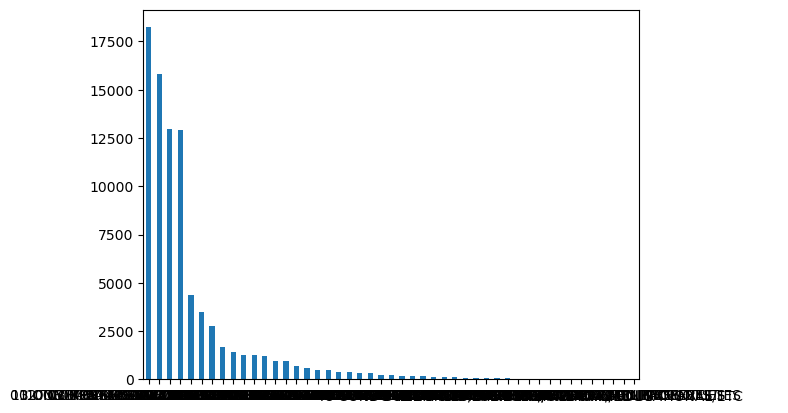

In [175]:
df['BUILDING CLASS CATEGORY'].value_counts().plot.bar(rot=0)

In [176]:
pd.crosstab(df["NEIGHBORHOOD"], df["BUILDING CLASS CATEGORY"], dropna=False)

BUILDING CLASS CATEGORY,01 ONE FAMILY DWELLINGS,02 TWO FAMILY DWELLINGS,03 THREE FAMILY DWELLINGS,04 TAX CLASS 1 CONDOS,05 TAX CLASS 1 VACANT LAND,06 TAX CLASS 1 - OTHER,07 RENTALS - WALKUP APARTMENTS,08 RENTALS - ELEVATOR APARTMENTS,09 COOPS - WALKUP APARTMENTS,10 COOPS - ELEVATOR APARTMENTS,...,40 SELECTED GOVERNMENTAL FACILITIES,41 TAX CLASS 4 - OTHER,42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,43 CONDO OFFICE BUILDINGS,44 CONDO PARKING,45 CONDO HOTELS,46 CONDO STORE BUILDINGS,47 CONDO NON-BUSINESS STORAGE,48 CONDO TERRACES/GARDENS/CABANAS,49 CONDO WAREHOUSES/FACTORY/INDUS
NEIGHBORHOOD,,,,,,,,,,,,,,,,,,,,,
AIRPORT LA GUARDIA,3,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ALPHABET CITY,0,0,0,0,0,0,8,4,58,3,...,0,0,1,0,0,0,3,2,0,0
ANNADALE,108,58,0,0,25,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
ARDEN HEIGHTS,211,40,0,21,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARROCHAR,27,11,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WOODHAVEN,158,200,32,0,1,1,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
WOODLAWN,22,23,8,0,1,1,3,1,0,23,...,0,1,0,0,0,0,0,0,0,0
WOODROW,82,47,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
# fill missing values with the mode after grouping it with other column

df['BUILDING CLASS CATEGORY'].fillna(df.groupby(['NEIGHBORHOOD'])['BUILDING CLASS CATEGORY'].transform(lambda x: x.mode()[0]), inplace=True)

<AxesSubplot:>

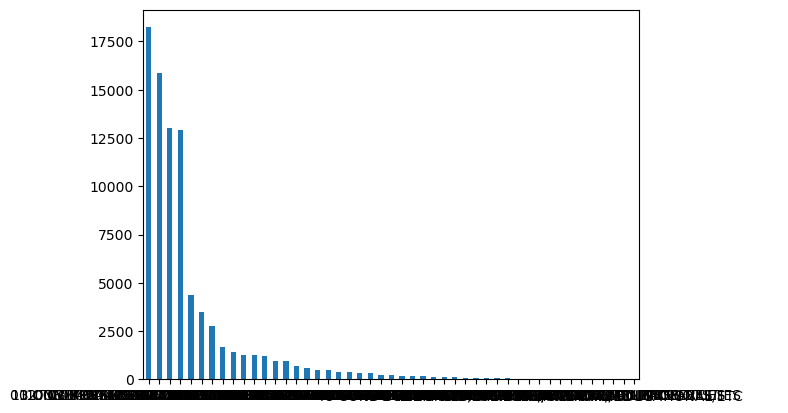

In [178]:
df['BUILDING CLASS CATEGORY'].value_counts().plot.bar(rot=0)

The column BUILDING CLASS CATEGORY is also treated using a cross tab method by filling with mode of the column by grouping with other column. As seen by the two graphs formed both are same that means this is a suitable method to handle this missing value.


In [179]:
print(df['BUILDING CLASS AT PRESENT'].value_counts())

D4    12663
R4    12482
A1     6753
A5     5683
B2     4923
      ...  
J9        1
HS        1
Y1        1
P7        1
Z7        1
Name: BUILDING CLASS AT PRESENT, Length: 167, dtype: int64


<AxesSubplot:>

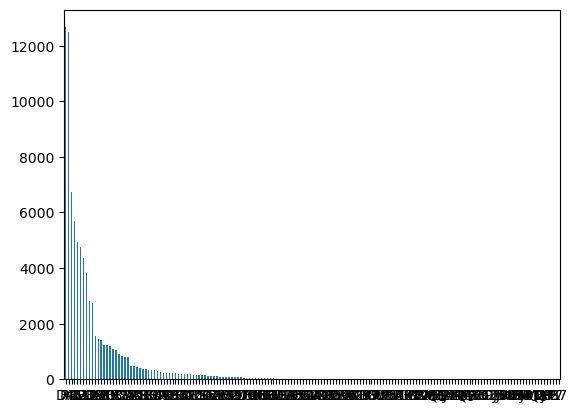

In [180]:
df['BUILDING CLASS AT PRESENT'].value_counts().plot.bar(rot=0)

In [181]:
#imputing with building class at time of sale

df['BUILDING CLASS AT PRESENT'] = df['BUILDING CLASS AT PRESENT'].fillna(df['BUILDING CLASS AT TIME OF SALE'])

<AxesSubplot:>

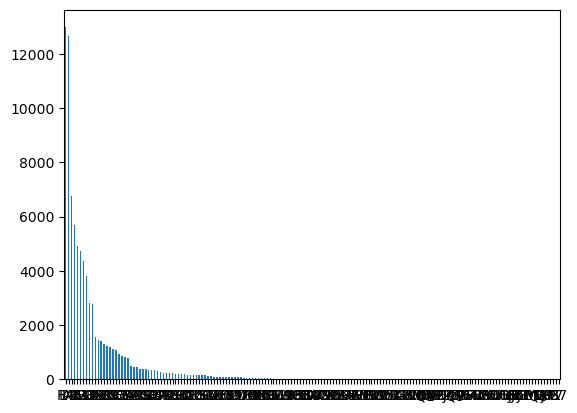

In [182]:
df['BUILDING CLASS AT PRESENT'].value_counts().plot.bar(rot=0)

#graph same before and after

In [183]:
#Since Addresses for each property are unique so they are filled with NO ADDRESS FOUND.

df['ADDRESS'].fillna(value='NO ADDRESS FOUND',inplace=True)

In [184]:
print(df['TAX CLASS AT PRESENT'].value_counts())

1     38633
2     30915
4      6140
2A     2520
2C     1915
1A     1444
1B     1234
2B      812
1C      186
3         4
Name: TAX CLASS AT PRESENT, dtype: int64


<AxesSubplot:>

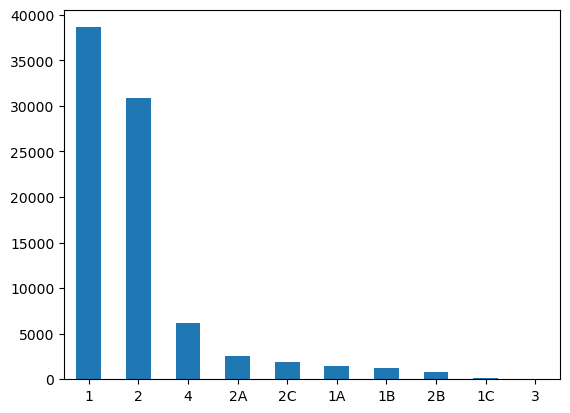

In [185]:
df['TAX CLASS AT PRESENT'].value_counts().plot.bar(rot=0)

In [186]:
#imputing with tax class at time of sale 

df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].fillna(df['TAX CLASS AT TIME OF SALE'])


<AxesSubplot:>

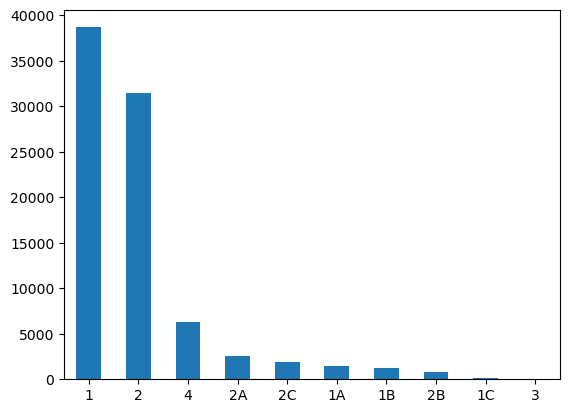

In [187]:
df['TAX CLASS AT PRESENT'].value_counts().plot.bar(rot=0)

#graph same before and after

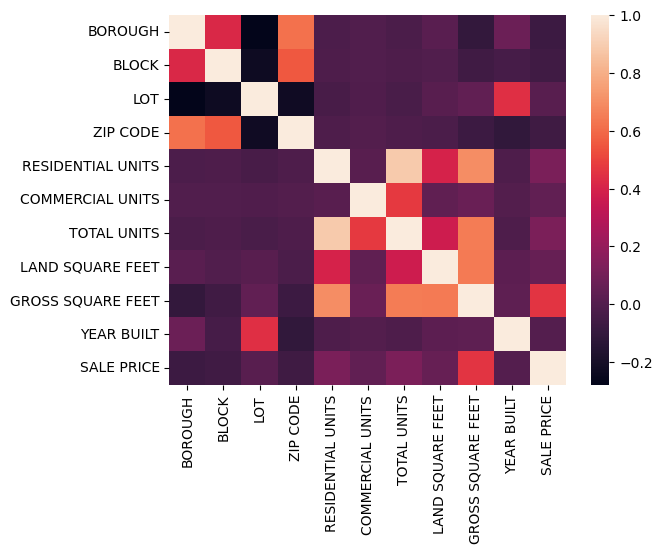

In [188]:
sns.heatmap(df.corr());

KNN AND MICE IMPUTATION

In [189]:
def knn(df, vars_to_impute, n_neighbors):
    missingdf_knn = df.copy(deep=True)
    
    imputer = KNNImputer(n_neighbors=n_neighbors)
    missingdf_knn[vars_to_impute] = imputer.fit_transform(missingdf_knn[vars_to_impute])

    return missingdf_knn

In [190]:
def mice(df, vars_to_impute):
    missingdf_mice = df.copy(deep=True)

    imputer = IterativeImputer(estimator=LinearRegression(), random_state=0)
    data_imputed = imputer.fit_transform(missingdf_mice[vars_to_impute])
    data_imputed = pd.DataFrame(data_imputed, columns=vars_to_impute)
    missingdf_mice[vars_to_impute] = data_imputed

    return missingdf_mice
    

In [191]:
df.isna().sum().sort_values()

BOROUGH                               0
BUILDING CLASS AT TIME OF SALE        0
TAX CLASS AT TIME OF SALE             0
TOTAL UNITS                           0
COMMERCIAL UNITS                      0
ADDRESS                               0
RESIDENTIAL UNITS                     0
TAX CLASS AT PRESENT                  0
BUILDING CLASS CATEGORY               0
NEIGHBORHOOD                          0
BUILDING CLASS AT PRESENT             0
SALE DATE                             3
LOT                                  10
BLOCK                                16
ZIP CODE                           1018
YEAR BUILT                         6970
SALE PRICE                        14561
LAND SQUARE FEET                  36578
GROSS SQUARE FEET                 39029
dtype: int64

In [192]:
df[df['SALE DATE'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,<NA>,65000,NO ADDRESS FOUND,10009,5,0,5,1633,6440,1900,2,C2,6625000,NaT
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,NO ADDRESS FOUND,<NA>,20,0,20,2581,9730,1900,2,C4,<NA>,NaT
66623,4,LONG ISLAND CITY,13 CONDOS - ELEVATOR APARTMENTS,4,31,1073,RP,5-15 49TH AVENUE,11101,0,0,1,<NA>,<NA>,2005,4,RP,<NA>,NaT


In [193]:
df['SALE DATE'].value_counts()

2017-06-29    544
2017-06-15    530
2016-12-22    527
2017-05-25    511
2016-10-06    508
             ... 
2017-01-08      2
2016-11-27      2
2017-07-09      2
2017-08-13      1
2017-06-04      1
Name: SALE DATE, Length: 364, dtype: int64

In [194]:
#very few values are missing so we imputed it with the mode
df['SALE DATE'].fillna(df['SALE DATE'].mode(), inplace=True)

In [195]:
df['LOT'].value_counts()

1       4125
20       983
12       972
40       935
23       911
        ... 
2134       1
1792       1
1790       1
4216       1
679        1
Name: LOT, Length: 2627, dtype: Int64

<AxesSubplot:xlabel='LOT'>

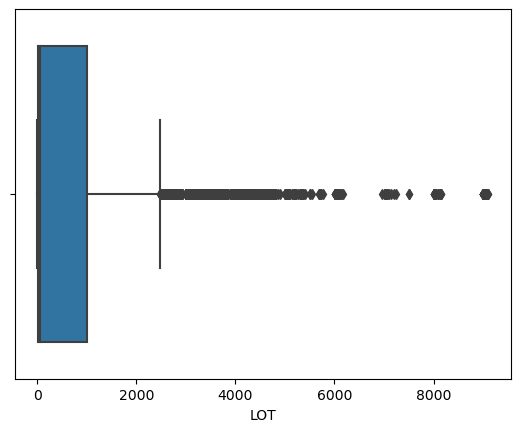

In [196]:
sns.boxplot(x=df['LOT'])

In [197]:
df['LOT'].describe()

count    84538.000000
mean       376.208060
std        658.142261
min          1.000000
25%         22.000000
50%         50.000000
75%       1001.000000
max       9106.000000
Name: LOT, dtype: float64

In [198]:
#imputing with the mode value in the column

df['LOT'].fillna(1, inplace=True)

<AxesSubplot:xlabel='LOT'>

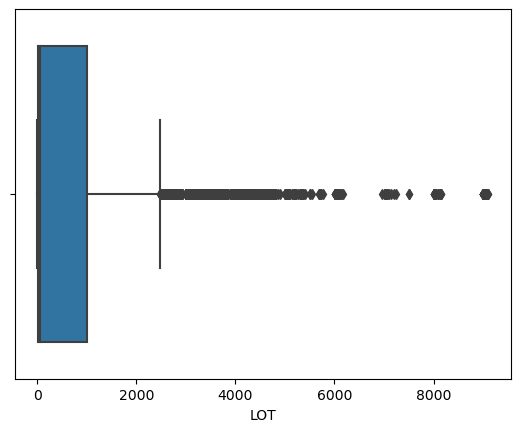

In [199]:
sns.boxplot(x=df['LOT'])

#graph same before and after

In [200]:
df['BLOCK'].value_counts()

5066     404
16       255
2135     211
4978     187
1171     181
        ... 
13029      1
13039      1
13040      1
6731       1
13959      1
Name: BLOCK, Length: 11566, dtype: Int64

<AxesSubplot:xlabel='BLOCK'>

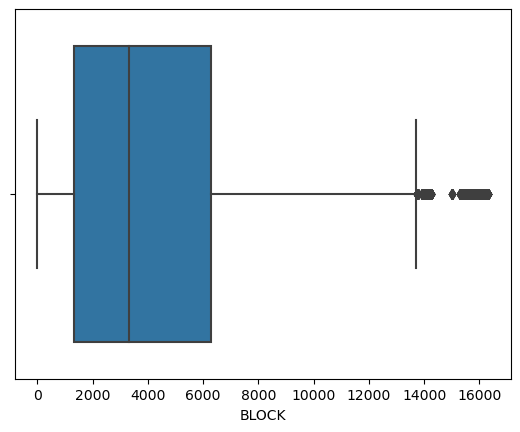

In [201]:
sns.boxplot(x=df['BLOCK'])

In [202]:
df['BLOCK'].describe()

count    84532.000000
mean      4237.949735
std       3568.205692
min          1.000000
25%       1323.000000
50%       3311.000000
75%       6283.000000
max      16322.000000
Name: BLOCK, dtype: float64

In [203]:
#imputing it with the mode value in the column
df['BLOCK'].fillna(5066, inplace=True)

<AxesSubplot:xlabel='BLOCK'>

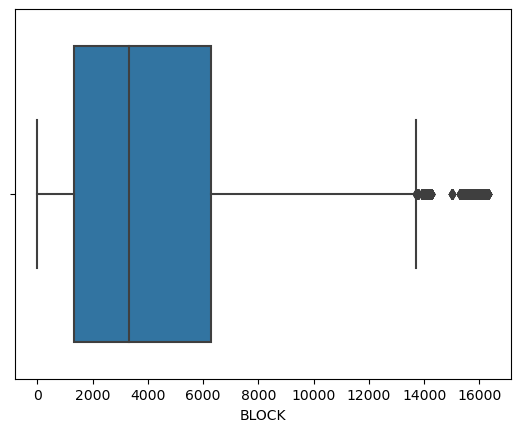

In [204]:
sns.boxplot(x=df['BLOCK'])
#graph same before and after

In [205]:
df['ZIP CODE'].value_counts()

10314    1687
11354    1384
11201    1324
11235    1312
11234    1165
         ... 
10105       5
11430       1
10167       1
10803       1
10281       1
Name: ZIP CODE, Length: 185, dtype: Int64

<AxesSubplot:xlabel='ZIP CODE'>

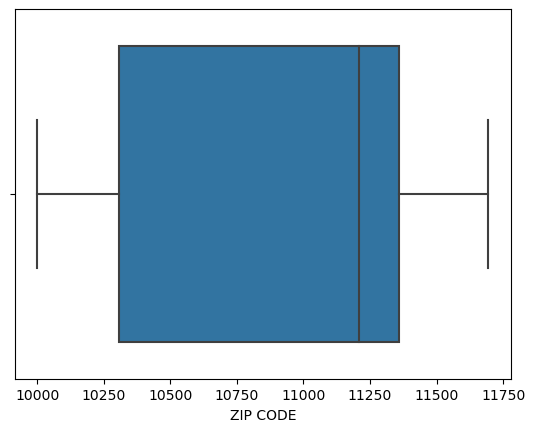

In [206]:
sns.boxplot(x=df['ZIP CODE'])

In [207]:
df['ZIP CODE'].describe()

count    83530.000000
mean     10858.123129
std        562.595318
min      10001.000000
25%      10306.000000
50%      11210.000000
75%      11357.000000
max      11694.000000
Name: ZIP CODE, dtype: float64

In [208]:
df.groupby('BOROUGH')['ZIP CODE'].apply(lambda x: x.isnull().sum())

BOROUGH
1    227
2     69
3    315
4    188
5    219
Name: ZIP CODE, dtype: int64

In [209]:
#Zip code depends on the location hence using "BOROUGH" to impute missing values of zip code by grouping it with "BOROUGH"
df['ZIP CODE'].fillna(df.groupby("BOROUGH")['ZIP CODE'].transform(lambda x: x.mode()[0]), inplace=True)

<AxesSubplot:xlabel='ZIP CODE'>

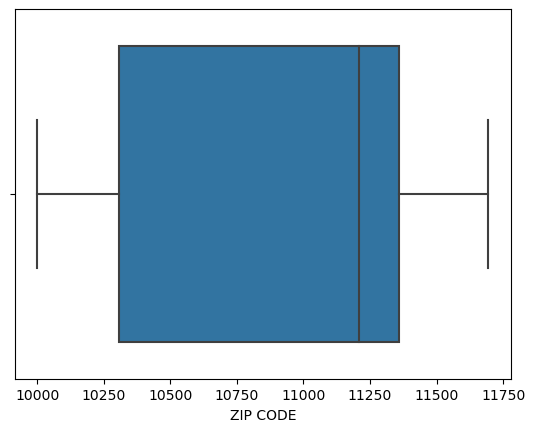

In [210]:
sns.boxplot(x=df['ZIP CODE'])

In [211]:
df['YEAR BUILT'].value_counts()

1920    6045
1930    5043
1925    4312
1910    3585
1950    3156
        ... 
1888       1
1849       1
1855       1
1111       1
1680       1
Name: YEAR BUILT, Length: 157, dtype: Int64

<AxesSubplot:xlabel='YEAR BUILT'>

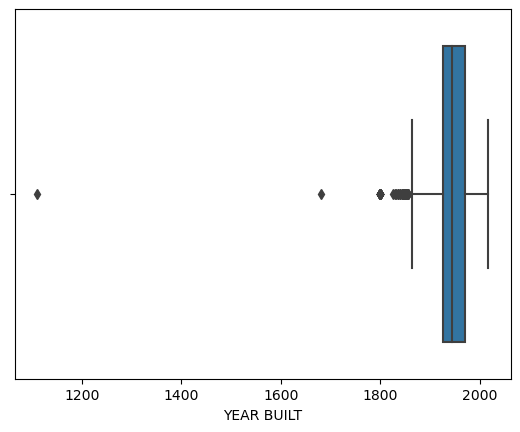

In [212]:
sns.boxplot(x=df['YEAR BUILT'])

In [213]:
df['YEAR BUILT'].describe()

count    77578.000000
mean      1950.084805
std         34.330251
min       1111.000000
25%       1925.000000
50%       1945.000000
75%       1970.000000
max       2017.000000
Name: YEAR BUILT, dtype: float64

In [214]:
#imputing it  with the mode value

df['YEAR BUILT'].fillna(1920, inplace=True)

<AxesSubplot:xlabel='YEAR BUILT'>

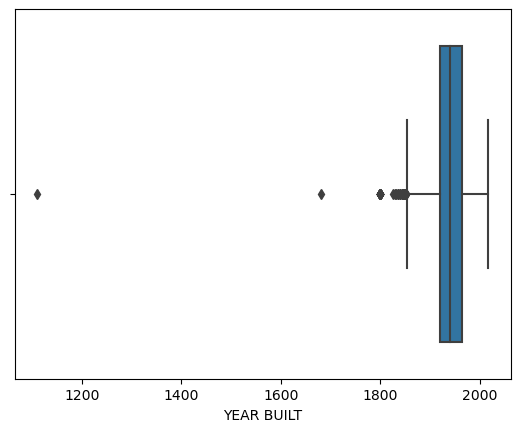

In [215]:
sns.boxplot(x=df['YEAR BUILT'])

#graph same before and after

In [216]:
#LAND SQUARE FEET and GROSS SQUARE FEET were MNAR
#same missing value patterns

df[['GROSS SQUARE FEET', 'LAND SQUARE FEET']].describe()

,GROSS SQUARE FEET,LAND SQUARE FEET
count,4.551900e+04,4.797000e+04
mean,5.060445e+03,4.790159e+03
std,3.911483e+04,4.623879e+04
min,6.000000e+01,2.000000e+00
25%,1.416500e+03,2.000000e+03
50%,2.000000e+03,2.500000e+03
75%,2.881000e+03,4.000000e+03
max,3.750565e+06,4.252327e+06


<AxesSubplot:xlabel='LAND SQUARE FEET', ylabel='GROSS SQUARE FEET'>

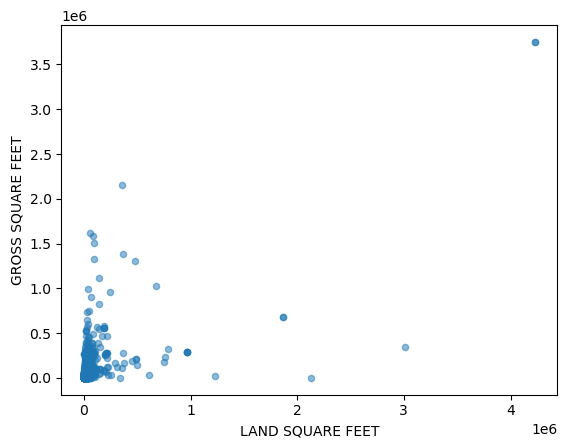

In [217]:
df.plot(x='LAND SQUARE FEET',y='GROSS SQUARE FEET',kind='scatter',alpha=0.5,cmap='rainbow')

In [218]:
#rows where both of these columns are null
nulls = ((df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].isnull())).sum()
nulls

36566

In [219]:
#KNN to impute missing values in both columns.

df_imputed = knn(df,['LAND SQUARE FEET', 'GROSS SQUARE FEET'],4)

<AxesSubplot:xlabel='LAND SQUARE FEET', ylabel='GROSS SQUARE FEET'>

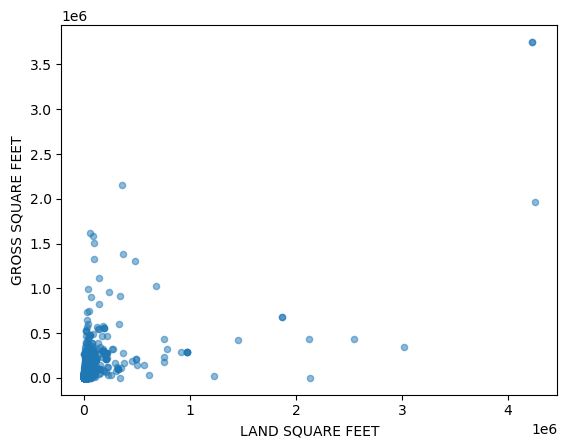

In [220]:
df_imputed.plot(x='LAND SQUARE FEET',y='GROSS SQUARE FEET',kind='scatter',alpha=0.5,cmap='rainbow')

KNN technique has given us better results without changing plot too much hence this method is suitable for these columns.

In [221]:
df[['LAND SQUARE FEET','GROSS SQUARE FEET']] = df_imputed[['LAND SQUARE FEET','GROSS SQUARE FEET']]

In [222]:
df['SALE PRICE'].describe()

count    6.998700e+04
mean     1.276456e+06
std      1.140526e+07
min      0.000000e+00
25%      2.250000e+05
50%      5.300000e+05
75%      9.500000e+05
max      2.210000e+09
Name: SALE PRICE, dtype: float64

<AxesSubplot:xlabel='GROSS SQUARE FEET', ylabel='SALE PRICE'>

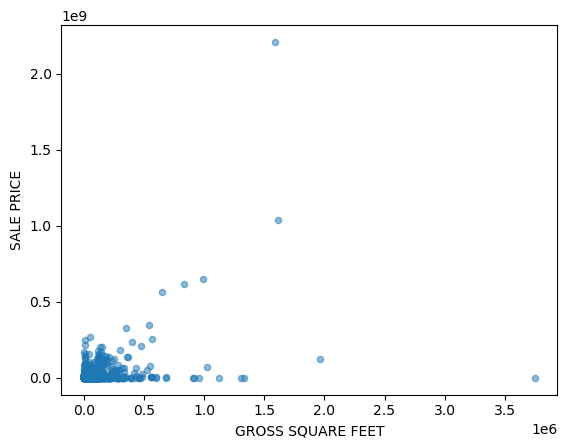

In [223]:
df.plot(x='GROSS SQUARE FEET',y='SALE PRICE',kind='scatter',alpha=0.5,cmap='rainbow')

In [224]:
#Using MICEto impute missing values in both columns.

df_imputed = mice(df,['SALE PRICE'])

<AxesSubplot:xlabel='GROSS SQUARE FEET', ylabel='SALE PRICE'>

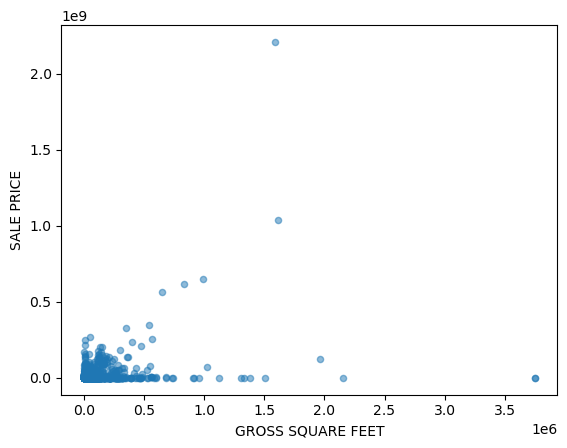

In [225]:
df_imputed.plot(x='GROSS SQUARE FEET',y='SALE PRICE',kind='scatter',alpha=0.5,cmap='rainbow')

MICE technique used as it yeilded results that havent cause the drastic change to the plot.

In [226]:
df_imputed['SALE PRICE'] = df_imputed['SALE PRICE'].round(2)


In [227]:
df['SALE PRICE'] = df_imputed['SALE PRICE']

In [228]:
df['SALE DATE'].value_counts()

2017-06-29    545
2017-06-15    530
2016-12-22    527
2017-05-25    511
2016-10-06    508
             ... 
2017-01-08      2
2016-11-27      2
2017-07-09      2
2017-08-13      1
2017-06-04      1
Name: SALE DATE, Length: 364, dtype: int64

In [229]:
#imputing with mode value
df['SALE DATE'].fillna('2017-06-29',inplace=True)

In [230]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

TIETJEN MOORE TEST FOR OUTLIER DETECTION

In [231]:
def tmttest(data, alpha=0.5):
    n = len(data)
    m = np.median(data)
    s = np.sum((data - m) ** 3) / (n * (np.std(data) ** 3))
    t = (s * np.sqrt(n - 1)) / np.sqrt(6)
    critical_value = np.sqrt(np.pi / 2) * np.sqrt((n - 1) * (1 - (alpha ** (2 / (n - 1))))) / np.sqrt(2 * np.log(np.log(n)))
    return abs(t) > critical_value
#TRUE indicates presence of outliers
#False indicates no presence of outliers

UNIVARIATE ANALYSIS OF THE DATA 

In [232]:
df['SALE MONTH'] = df['SALE DATE'].dt.month
df['SALE YEAR'] = df['SALE DATE'].dt.year

In [233]:
df['SALE PRICE'].max()

2210000000.0

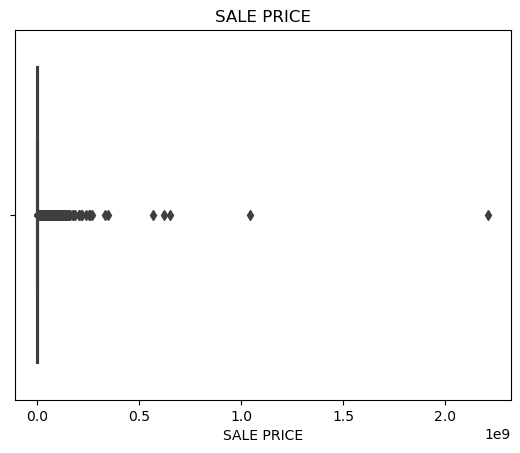

In [234]:
sns.boxplot(x=df['SALE PRICE'])
plt.title('SALE PRICE')
plt.show()
#We can see few outliers in the "SALE PRICE" column, according to the box and whiskers diagram.

In [235]:
tmttest(df['SALE PRICE'], alpha=0.5)
#This indicates that there are outliers in the column

True

<Figure size 1200x500 with 0 Axes>

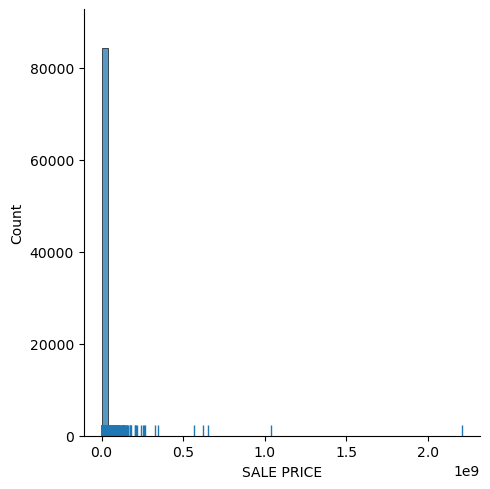

In [236]:
plt.figure(figsize=(12,5))
sns.displot(df['SALE PRICE'], bins=60, rug=True)
plt.show()
#Shows the frequency of the Sale price

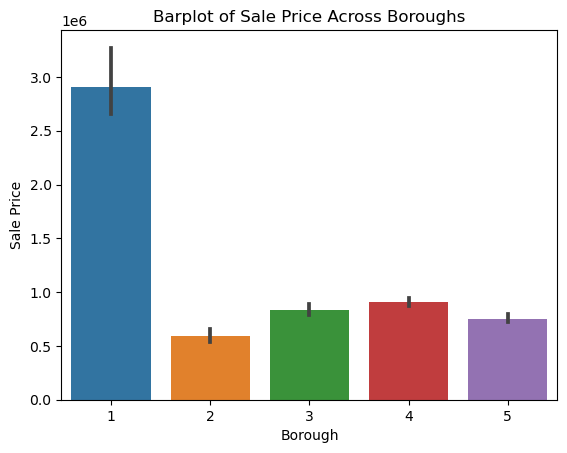

In [237]:
sns.barplot(data=df, x="BOROUGH", y="SALE PRICE")
plt.title("Barplot of Sale Price Across Boroughs")
plt.xlabel("Borough")
plt.ylabel("Sale Price")
plt.show()
#It shows the Sales price with respect to Borough. We can see the 1 in Borough has the highest sale price, which is Manhattan

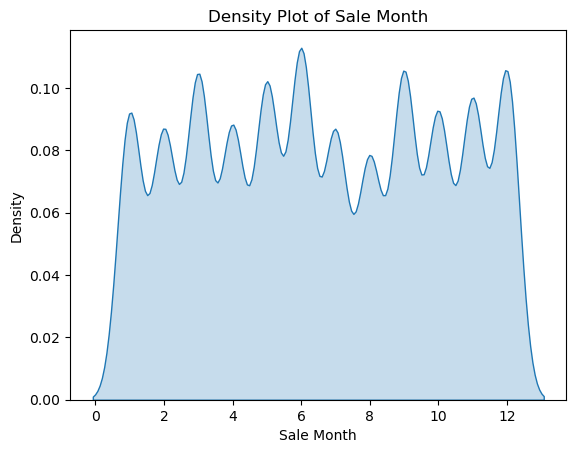

In [238]:
sns.kdeplot(data=df, x="SALE MONTH", fill=True)
plt.title("Density Plot of Sale Month")
plt.xlabel("Sale Month")
plt.ylabel("Density")
plt.show()
#This shows the sales accross different months. We can see that the 5th month has the highest density thus higest sale

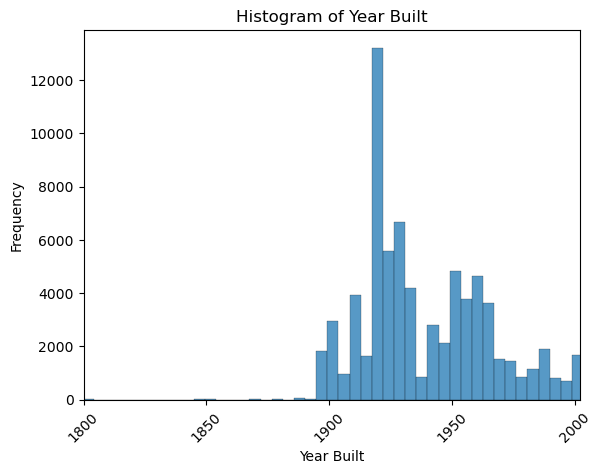

In [239]:
sns.histplot(data=df, x="YEAR BUILT", bins=200)
plt.xlim(1800, 2002)
plt.xticks(range(1800, 2002, 50), rotation=45)
plt.title("Histogram of Year Built")
plt.xlabel("Year Built")
plt.ylabel("Frequency")
plt.show()
#Majority of the buildings are built in the years between 1900 and 1950

In [240]:
tmttest(df['YEAR BUILT'], alpha=0.5)
#This indicates that there are outliers in the column

True

<AxesSubplot:>

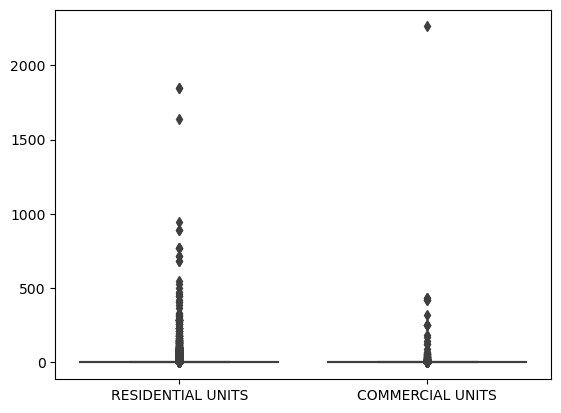

In [241]:
sns.boxplot(data=df[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS']])

We can see that there are more outliers in residential units than in commercial units

In [242]:
tmttest(df['RESIDENTIAL UNITS'], alpha=0.5)
#Outliers are present

True

In [243]:
tmttest(df['COMMERCIAL UNITS'], alpha=0.5)
#Outliers are present

True

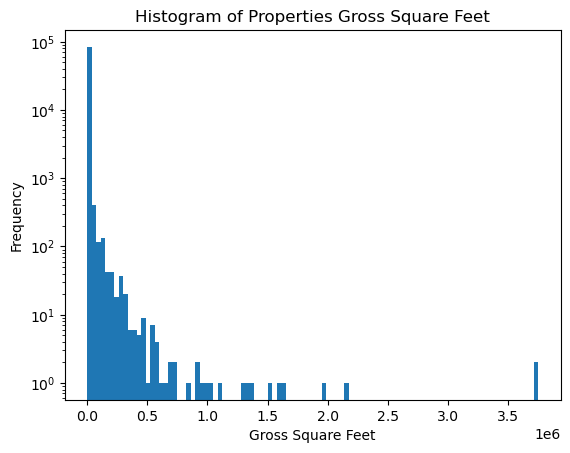

In [244]:
plt.hist(df["GROSS SQUARE FEET"], bins=100, log=True)
plt.title("Histogram of Properties Gross Square Feet")
plt.xlabel("Gross Square Feet")
plt.ylabel("Frequency")
plt.show()

In [245]:
tmttest(df['GROSS SQUARE FEET'], alpha=0.5)
#Outliers exist

True

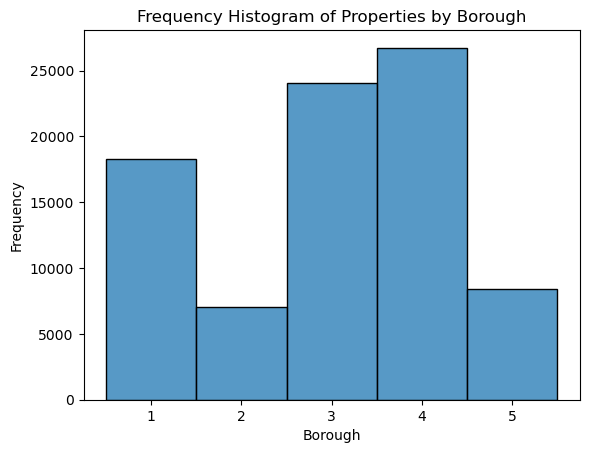

In [246]:
sns.histplot(data=df, x="BOROUGH", discrete=True)
plt.title("Frequency Histogram of Properties by Borough")
plt.xlabel("Borough")
plt.ylabel("Frequency")
plt.show()

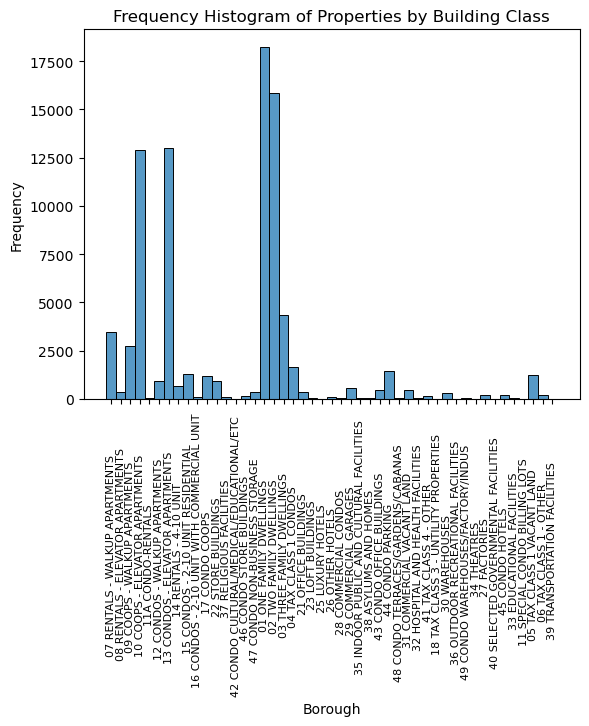

In [247]:
sns.histplot(data=df, x="BUILDING CLASS CATEGORY", discrete=True)
plt.xticks(rotation=90, fontsize=8)
plt.title("Frequency Histogram of Properties by Building Class")
plt.xlabel("Borough")
plt.ylabel("Frequency")
plt.show()

BIVARIATE ANALYSIS OF THE DATA

In [248]:
import pandas as pd
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm



CHI-SQUARED TEST

The function takes in categorical variables and returns dependent if they are correlated and independent otherwise.

In [249]:
def chitest(df, col1, col2, alpha=0.05):

    data_crosstab = pd.crosstab(df[col1], df[col2], margins=False)
    stat, p, dof, expected = chi2_contingency(data_crosstab)
    if p <= alpha:
        return 'Dependent (reject H0)'
    else:
        return 'Independent (fail to reject H0)'

In [250]:
chitest(df,'NEIGHBORHOOD','BOROUGH')

#The result of the analysis shows that Neighborhood depends on Borough. 

'Dependent (reject H0)'

In [251]:
chitest(df,'BUILDING CLASS CATEGORY','BOROUGH')

#The result of the analysis shows that Building class category depends on Borough. 

'Dependent (reject H0)'

In [252]:
chitest(df,'BUILDING CLASS CATEGORY','BUILDING CLASS AT PRESENT')

#The result of the analysis shows that Building class at present depends on Building class category. 

'Dependent (reject H0)'

In [253]:
chitest(df,'BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT')

#The result of the analysis shows that Building class category depends on Tax class at present. 

'Dependent (reject H0)'

In [254]:
chitest(df,'BUILDING CLASS AT TIME OF SALE','BUILDING CLASS AT PRESENT')

#The building class at present is dependent on the building class at time of sale.

'Dependent (reject H0)'

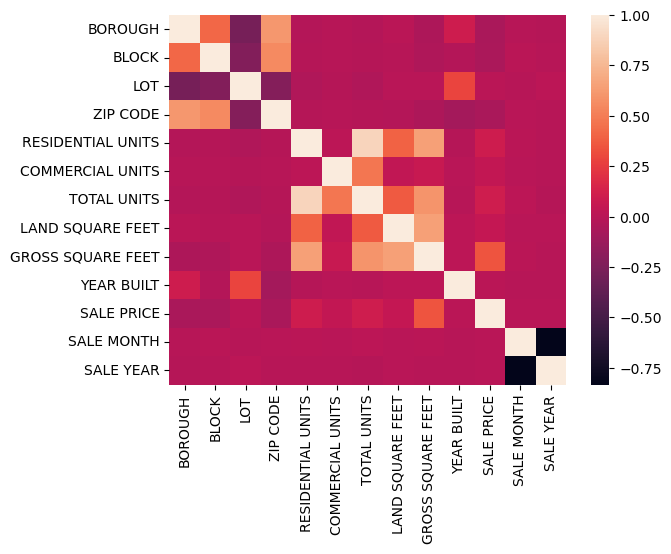

In [255]:
sns.heatmap(df.corr());
#The correlation heatmap shows the relationships between numerical variables in the dataset.

ANOVA TEST

The function for anova test takes in a categorical column and a numerical column and checks if the mean values are equal. 
the p value is adjusted so it doesnt display exponential terms. 
Null hypothesis: The mean of different groups is equal.
If p value is less than the significance i.e 0.5 then the null hypothesis is rejected

In [256]:
def anova(df, dependent_var, independent_var):
    groups = df.groupby(independent_var)[dependent_var].apply(list)
    anova_table = f_oneway(*groups.values)
    print(f"\nAnova => {dependent_var} - {independent_var}")
    print("F-value:", anova_table.statistic)
    print("p-value:", format(anova_table.pvalue, 'f'))


In [257]:
anova(df, 'SALE PRICE', 'BOROUGH')
#"SALE PRICE" and "BOROUGH" have different means, and we can see that the p-value or null hypothesis is 0 which is less than 0.05
# hence it is rejected.


Anova => SALE PRICE - BOROUGH
F-value: 145.84017949057147
p-value: 0.000000


In [258]:
anova(df, 'SALE PRICE', 'BUILDING CLASS CATEGORY')
#"SALE PRICE" and "BUILDING CLASS CATEGORY" have different means, and we can see that the p-value or null hypothesis is 0 which is less than 0.05
# hence it is rejected.


Anova => SALE PRICE - BUILDING CLASS CATEGORY
F-value: 89.61497898836801
p-value: 0.000000


In [259]:
anova(df, 'SALE PRICE', 'TAX CLASS AT PRESENT')
#"SALE PRICE" and "TAX CLASS AT PRESENT" have different means, and we can see that the p-value or null hypothesis is 0 which is less than 0.05
# hence it is rejected.


Anova => SALE PRICE - TAX CLASS AT PRESENT
F-value: 60.857801687073085
p-value: 0.000000


In [260]:
with pd.ExcelWriter('KHANSA JUNAID_23074_SUMAIR KHANANI_22995_CLEANDATA.xlsx') as writer:
    df.to_excel(writer, sheet_name='Sheet1', index=False)